In [1]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

/Users/pisit/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
rna_dataframe = pd.read_csv('/Users/pisit/Desktop/indiv/data.csv')
rna_dataframe = rna_dataframe.reindex(np.random.permutation(rna_dataframe.index))
rna_dataframe

A   T   C   G  AA  AT  AC  AG  TA  TT ...   GGGTG  GGGCA  GGGCT  \
38545 0.3 0.2 0.2 0.2 0.1 0.1 0.1 0.1 0.1 0.1 ...     0.0    0.0    0.0   
35323 0.2 0.2 0.3 0.3 0.0 0.0 0.1 0.1 0.0 0.0 ...     0.0    0.0    0.0   
25669 0.2 0.2 0.3 0.3 0.0 0.0 0.0 0.1 0.0 0.0 ...     0.0    0.0    0.0   
34738 0.3 0.3 0.2 0.2 0.1 0.1 0.1 0.1 0.0 0.1 ...     0.0    0.0    0.0   
7411  0.3 0.3 0.2 0.2 0.1 0.1 0.1 0.1 0.0 0.1 ...     0.0    0.0    0.0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  .. ...     ...    ...    ...   
874   0.4 0.2 0.2 0.2 0.2 0.1 0.1 0.1 0.1 0.1 ...     0.0    0.0    0.0   
10242 0.3 0.3 0.2 0.2 0.1 0.1 0.1 0.1 0.1 0.1 ...     0.0    0.0    0.0   
8288  0.3 0.3 0.2 0.2 0.1 0.1 0.1 0.1 0.1 0.1 ...     0.0    0.0    0.0   
35500 0.3 0.3 0.2 0.2 0.1 0.1 0.0 0.1 0.1 0.1 ...     0.0    0.0    0.0   
19465 0.3 0.2 0.3 0.2 0.1 0.1 0.1 0.1 0.0 0.1 ...     0.0    0.0    0.0   

       GGGCC  GGGCG  GGGGA  GGGGT  GGGGC  GGGGG  LNC  
38545    0.0    0.0    0.0    0.0    0.0    0.0    0  
35323    0.0    0.0    0.0    0.0    0.0    0.0    0  
25669    0.0    0.0    0.0    0.0    0.0    0.0    0  
34738    0.0    0.0    0.0    0.0    0.0    0.0    0  
7411     0.0    0.0    0.0    0.0    0.0    0.0    1  
...      ...    ...    ...    ...    ...    ...  ...  
874      0.0    0.0    0.0    0.0    0.0    0.0    1  
10242    0.0    0.0    0.0    0.0    0.0    0.0    1  
8288     0.0    0.0    0.0    0.0    0.0    0.0    1  
35500    0.0    0.0    0.0    0.0    0.0    0.0    0  
19465    0.0    0.0    0.0    0.0    0.0    0.0    1  

[40000 rows x 1365 columns]

In [3]:
rna_dataframe.describe()

A       T       C       G      AA      AT      AC      AG      TA  \
count 40000.0 40000.0 40000.0 40000.0 40000.0 40000.0 40000.0 40000.0 40000.0   
mean      0.3     0.2     0.2     0.2     0.1     0.1     0.1     0.1     0.0   
std       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.1     0.1     0.1     0.1     0.0     0.0     0.0     0.0     0.0   
25%       0.2     0.2     0.2     0.2     0.1     0.0     0.0     0.1     0.0   
50%       0.3     0.2     0.2     0.2     0.1     0.1     0.1     0.1     0.0   
75%       0.3     0.3     0.3     0.3     0.1     0.1     0.1     0.1     0.1   
max       0.5     0.5     0.5     0.5     0.2     0.2     0.2     0.2     0.2   

           TT   ...     GGGTG   GGGCA   GGGCT   GGGCC   GGGCG   GGGGA   GGGGT  \
count 40000.0   ...   40000.0 40000.0 40000.0 40000.0 40000.0 40000.0 40000.0   
mean      0.1   ...       0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       0.0   ...       0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.0   ...       0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       0.0   ...       0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       0.1   ...       0.0     0.0     0.0     0.0     0.0     0.0     0.0   
75%       0.1   ...       0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max       0.3   ...       0.0     0.0     0.0     0.0     0.0     0.0     0.0   

        GGGGC   GGGGG     LNC  
count 40000.0 40000.0 40000.0  
mean      0.0     0.0     0.5  
std       0.0     0.0     0.5  
min       0.0     0.0     0.0  
25%       0.0     0.0     0.0  
50%       0.0     0.0     0.5  
75%       0.0     0.0     1.0  
max       0.0     0.1     1.0  

[8 rows x 1365 columns]

In [4]:
def preprocess_features(rna_dataframe):
    lst = []
    for a in 'ATCG':
        lst.append(a)
    for a in 'ATCG':
        for b in 'ATCG':
            lst.append(a + b)
    for a in 'ATCG':
        for b in 'ATCG':
            for c in 'ATCG':
                lst.append(a + b + c)
#    for a in 'ATCG':
#         for b in 'ATCG':
#            for c in 'ATCG':
#                 for d in 'ATCG':
#                    lst.append(a + b + c + d)
#     for a in 'ATCG':
#         for b in 'ATCG':
#             for c in 'ATCG':
#                 for d in 'ATCG':
#                     for e in 'ATCG':
#                         lst.append(a + b + c + d + e)
    selected_features = rna_dataframe[lst]
    processed_features = selected_features.copy()
    return processed_features

def preprocess_targets(rna_dataframe):
    output_targets = pd.DataFrame()
    output_targets["LNC"] = rna_dataframe["LNC"]
    return output_targets

In [5]:
training_examples = preprocess_features(rna_dataframe).head(30000)
training_targets = preprocess_targets(rna_dataframe).head(30000)

validation_examples = training_examples.tail(10000)
validation_targets = training_targets.tail(10000)

training_examples = training_examples.head(20000)
training_targets = training_targets.head(20000)

test_examples = preprocess_features(rna_dataframe).tail(10000)
test_targets = preprocess_targets(rna_dataframe).tail(10000)

In [6]:
def construct_feature_columns(input_features):
  """Construct the TensorFlow Feature Columns.

  Args:
    input_features: The names of the numerical input features to use.
  Returns:
    A set of feature columns
  """

  return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])

In [7]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                            
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [8]:
def train_dnn_classifier_model(
    learning_rate,
    steps,
    batch_size,
    regularization_strength,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    
  periods = 50
  steps_per_period = steps / periods
  
  # Create a linear classifier object.
  my_optimizer = tf.train.ProximalAdagradOptimizer(
      learning_rate=learning_rate,
      l1_regularization_strength=regularization_strength
    )
  dnn_classifier = tf.estimator.DNNClassifier(
      feature_columns = construct_feature_columns(training_examples),
      optimizer = my_optimizer,
      hidden_units=[16, 16]
  )
  
  # Create input functions.
  training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets["LNC"], 
                                          batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["LNC"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["LNC"], 
                                                    num_epochs=1, 
                                                    shuffle=False)
  
  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("LogLoss (on training data):")
  training_log_losses = []
  validation_log_losses = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    dnn_classifier.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    # Take a break and compute predictions.    
    training_probabilities = dnn_classifier.predict(input_fn=predict_training_input_fn)
    training_probabilities = np.array([item['probabilities'] for item in training_probabilities])
    
    validation_probabilities = dnn_classifier.predict(input_fn=predict_validation_input_fn)
    validation_probabilities = np.array([item['probabilities'] for item in validation_probabilities])
    
    training_log_loss = metrics.log_loss(training_targets, training_probabilities)
    validation_log_loss = metrics.log_loss(validation_targets, validation_probabilities)
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, training_log_loss))
    # Add the loss metrics from this period to our list.
    training_log_losses.append(training_log_loss)
    validation_log_losses.append(validation_log_loss)
  print("Model training finished.")
  
  # Output a graph of loss metrics over periods.
  plt.ylabel("LogLoss")
  plt.xlabel("Periods")
  plt.title("LogLoss vs. Periods")
  plt.tight_layout()
  plt.plot(training_log_losses, label="training")
  plt.plot(validation_log_losses, label="validation")
  plt.legend()

  return dnn_classifier

In [9]:
dnn_classifier = train_dnn_classifier_model(
    learning_rate=0.03,
    steps=10000,
    batch_size=1000,
    regularization_strength=0.0001,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

Training model...
LogLoss (on training data):
  period 00 : 0.60
  period 01 : 0.56
  period 02 : 0.55
  period 03 : 0.53
  period 04 : 0.52
  period 05 : 0.51
  period 06 : 0.50
  period 07 : 0.50
  period 08 : 0.50
  period 09 : 0.49
  period 10 : 0.49
  period 11 : 0.49
  period 12 : 0.49
  period 13 : 0.48
  period 14 : 0.48
  period 15 : 0.48
  period 16 : 0.48
  period 17 : 0.48
  period 18 : 0.47
  period 19 : 0.47
  period 20 : 0.47
  period 21 : 0.47
  period 22 : 0.47
  period 23 : 0.47
  period 24 : 0.47
  period 25 : 0.47
  period 26 : 0.47
  period 27 : 0.47
  period 28 : 0.46
  period 29 : 0.46
  period 30 : 0.46
  period 31 : 0.46
  period 32 : 0.46
  period 33 : 0.46
  period 34 : 0.46
  period 35 : 0.46
  period 36 : 0.46
  period 37 : 0.46
  period 38 : 0.46
  period 39 : 0.46
  period 40 : 0.46
  period 41 : 0.46
  period 42 : 0.46
  period 43 : 0.45
  period 44 : 0.45
  period 45 : 0.45
  period 46 : 0.45
  period 47 : 0.45
  period 48 : 0.45
  period 49 : 0.45
Mode

In [10]:
predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["LNC"], 
                                                    num_epochs=1, 
                                                    shuffle=False)
evaluation_metrics = dnn_classifier.evaluate(input_fn=predict_validation_input_fn)

print("AUC on the validation set: %0.2f" % evaluation_metrics['auc'])
print("Accuracy on the validation set: %0.2f" % evaluation_metrics['accuracy'])

AUC on the validation set: 0.87
Accuracy on the validation set: 0.79


In [11]:
validation_probabilities = dnn_classifier.predict(input_fn=predict_validation_input_fn)
# Get just the probabilities for the positive class.
validation_probabilities = np.array([item['probabilities'][1] for item in validation_probabilities])

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(
    validation_targets, validation_probabilities)
plt.plot(false_positive_rate, true_positive_rate, label="our model")
plt.plot([0, 1], [0, 1], label="random classifier")
_ = plt.legend(loc=2)

In [12]:
predict_test_input_fn = lambda: my_input_fn(test_examples, 
                                                    test_targets["LNC"], 
                                                    num_epochs=1, 
                                                    shuffle=False)
evaluation_metrics = dnn_classifier.evaluate(input_fn=predict_test_input_fn)

print("AUC on the test set: %0.2f" % evaluation_metrics['auc'])
print("Accuracy on the test set: %0.2f" % evaluation_metrics['accuracy'])

AUC on the test set: 0.86
Accuracy on the test set: 0.79


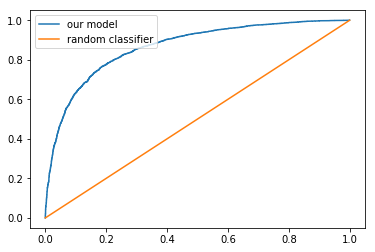

In [13]:
test_probabilities = dnn_classifier.predict(input_fn=predict_test_input_fn)
# Get just the probabilities for the positive class.
test_probabilities = np.array([item['probabilities'][1] for item in test_probabilities])

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(
    test_targets, test_probabilities)
plt.plot(false_positive_rate, true_positive_rate, label="our model")
plt.plot([0, 1], [0, 1], label="random classifier")
_ = plt.legend(loc=2)